# Predicting Borrower Payback with Lending Club Dataset

- I will be creating a predictive model using Decision Trees and Random Forests to predict whether a borrower will pay back investors on the platform Lending Club. The goal is that, as an investor, you would be able to identify the best people to invest in (the people most likely to pay you back).

- I am completing this project as part of the online Udemy course "Python for Data Science and Machine Learning Bootcamp"

## Import Libraries and Retrieve Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

##### This data will come from 2007-2010 and has been provided by the course

In [3]:
loan_data = pd.read_csv(r"D:\my_project\Decision_Trees_and_random_forest_to_Pedict_Borrower_Payback\loan_data.csv")
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


#### We're given this information about our dataset:

### Dataset Information  

- **credit.policy**:   
  - 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.  

- **purpose**:   
  - The purpose of the loan, which can take the following values:  
    - "credit_card"  
    - "debt_consolidation"  
    - "educational"  
    - "major_purchase"  
    - "small_business"  
    - "all_other"  

- **int.rate**:   
  - The interest rate of the loan, expressed as a proportion (e.g., a rate of 11% would be stored as 0.11). Borrowers deemed more risky by LendingClub.com are assigned higher interest rates.  

- **installment**:   
  - The monthly installments owed by the borrower if the loan is funded.  

- **log.annual.inc**:   
  - The natural log of the self-reported annual income of the borrower.  

- **dti**:   
  - The debt-to-income ratio of the borrower (amount of debt divided by annual income).  

- **fico**:   
  - The FICO credit score of the borrower.  

- **days.with.cr.line**:   
  - The number of days the borrower has had a credit line.  

- **revol.bal**:   
  - The borrower's revolving balance (the amount unpaid at the end of the credit card billing cycle).  

- **revol.util**:   
  - The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).  

- **inq.last.6mths**:   
  - The number of inquiries by creditors in the last 6 months.  

- **delinq.2yrs**:   
  - The number of times the borrower has been 30+ days past due on a payment in the past 2 years.  

- **pub.rec**:   
  - The number of derogatory public records (bankruptcy filings, tax liens, or judgments) associated with the borrower.

In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loan_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## Exploratory Data Analysis (EDA)

### Overview

In [6]:
# Data info  
print("Number of variables:", loan_data.shape[1])  
print("Number of observations:", loan_data.shape[0])  
print("Total missing values:", loan_data.isnull().sum().sum())  
print("Total size in memory:", loan_data.memory_usage(deep=True).sum(), "bytes")

Number of variables: 14
Number of observations: 9578
Total missing values: 0
Total size in memory: 1600274 bytes


In [7]:
# Variables types
print(loan_data.dtypes)  

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object


In [8]:
# Check missing values
missing_values = loan_data.isnull().mean()  
print("Total missing values(%):\n", missing_values)  

Total missing values(%):
 credit.policy        0.0
purpose              0.0
int.rate             0.0
installment          0.0
log.annual.inc       0.0
dti                  0.0
fico                 0.0
days.with.cr.line    0.0
revol.bal            0.0
revol.util           0.0
inq.last.6mths       0.0
delinq.2yrs          0.0
pub.rec              0.0
not.fully.paid       0.0
dtype: float64


### Variables

- credit.policy

In [9]:
print(f"Mean: {loan_data['credit.policy'].mean():.2f}\n")
print(loan_data['credit.policy'].value_counts())

print('\nToggle details')
print(loan_data['credit.policy'].value_counts(normalize=True)*100)

Mean: 0.80

credit.policy
1    7710
0    1868
Name: count, dtype: int64

Toggle details
credit.policy
1    80.496972
0    19.503028
Name: proportion, dtype: float64


##### days.with.cr.line
-  Statistics

In [10]:
def descriptive_insurance(data, column):  
    mean_value = data[column].mean()  
    std_dev = data[column].std()  
  
   
    insu = {  
        'Mean': mean_value,  
        'Median': data[column].median(),  
        'Mode': data[column].mode(),  
        'Min': data[column].min(),  
        'Max': data[column].max(),  
        'Range': data[column].max() - data[column].min(),  
        'Std Dev': std_dev,  
        'Q1': data[column].quantile(0.25),  
        'Q3': data[column].quantile(0.75),  
        'IQR': data[column].quantile(0.75) - data[column].quantile(0.25),  
        'Skewness': data[column].skew(),  
        'Kurtosis': data[column].kurtosis(),  
        'Variance': data[column].var(),  
        'SUM': data[column].sum(),  
        'Coefficient of Variation': std_dev / mean_value if mean_value != 0 else None,  # Coefficient of Variation  
        'Memory Size': data[column].memory_usage(deep=True)  
    }  
    return insu

In [11]:
print("*** Quantile statistics ***")
dcr_insu = descriptive_insurance(loan_data, 'days.with.cr.line')
print(f"Min: {dcr_insu['Min']}")
print(f"Q1: {dcr_insu['Q1']}")
print(f"Median: {dcr_insu['Median']:.2f}")
print(f"Q3: {dcr_insu['Q3']}")
print(f"Max: {dcr_insu['Max']}")
print(f"Range: {dcr_insu['Range']}")
print(f"IQR: {dcr_insu['IQR']}")

print("\n*** Descriptive statistics ***")
print(f"Std Dev: {dcr_insu['Std Dev']:.2f}")
print(f"Coefficient of Variation: {dcr_insu['Coefficient of Variation']:.2f}")
print(f"Kurtosis: {dcr_insu['Kurtosis']:.2f}")
print(f"Mean: {dcr_insu['Mean']:.2f}")
print(f"Skewness: {dcr_insu['Skewness']:.2f}")
print(f"SUM: {dcr_insu['SUM']}") 
print(f"Variance: {dcr_insu['Variance']:.2f}")  
print(f"Memory Size: {dcr_insu['Memory Size']} bytes")  

*** Quantile statistics ***
Min: 178.9583333
Q1: 2820.0
Median: 4139.96
Q3: 5730.0
Max: 17639.95833
Range: 17460.9999967
IQR: 2910.0

*** Descriptive statistics ***
Std Dev: 2496.93
Coefficient of Variation: 0.55
Kurtosis: 1.94
Mean: 4560.77
Skewness: 1.16
SUM: 43683028.2083568
Variance: 6234661.31
Memory Size: 76756 bytes


- Histogram

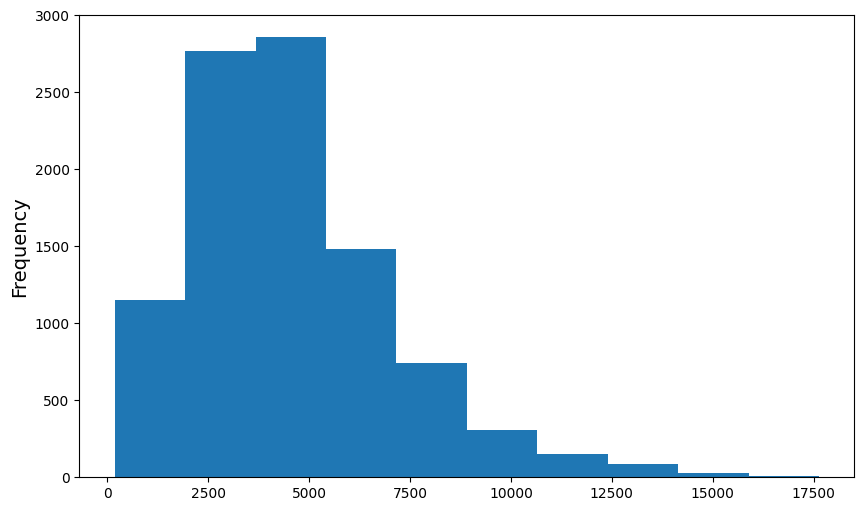

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(loan_data['days.with.cr.line'], bins=10, edgecolor='none')
# plt.title('Histogram of Days with Credit Line', fontsize=16)  
# plt.xlabel('Days with Credit Line', fontsize=14)  
plt.ylabel('Frequency', fontsize=14) 
plt.ylim(0, 3000)
plt.show()

- Common Values & Extreme Values

In [13]:
value_counts = loan_data['days.with.cr.line'].value_counts().reset_index()  
value_counts.columns = ['Value', 'Count']  
value_counts['Frequency (%)'] = (value_counts['Count'] / value_counts['Count'].sum()) * 100  

# Top 10 Common values
top_values = value_counts.head(10)   
print("*** Top 10 Values: ***")  
print(top_values)  

min_values = value_counts.nsmallest(5, 'Value')  
max_values = value_counts.nlargest(5, 'Value')  

print("\n*** Minimum 5 values: ***")  
print(min_values)  

print("\n*** Maximum 5 values: ***")  
print(max_values)

*** Top 10 Values: ***
    Value  Count  Frequency (%)
0  3660.0     50       0.522030
1  3630.0     48       0.501148
2  3990.0     46       0.480267
3  4410.0     44       0.459386
4  3600.0     41       0.428064
5  4080.0     38       0.396743
6  2550.0     38       0.396743
7  1800.0     37       0.386302
8  3690.0     37       0.386302
9  4020.0     35       0.365421

*** Minimum 5 values: ***
           Value  Count  Frequency (%)
2282  178.958333      1       0.010441
738   180.041667      3       0.031322
2347  181.000000      1       0.010441
2447  183.041667      1       0.010441
2457  209.041667      1       0.010441

*** Maximum 5 values: ***
            Value  Count  Frequency (%)
2514  17639.95833      1       0.010441
2241  17616.00000      1       0.010441
1861  16652.00000      1       0.010441
1942  16350.00000      1       0.010441
2536  16260.00000      1       0.010441


##### delinq.2yrs 
- Statistics

In [14]:
print("*** Quantile statistics ***")
del_insu = descriptive_insurance(loan_data, 'delinq.2yrs')
print(f"Min: {del_insu['Min']}")
print(f"Q1: {del_insu['Q1']}")
print(f"Median: {del_insu['Median']:.2f}")
print(f"Q3: {del_insu['Q3']}")
print(f"Max: {del_insu['Max']}")
print(f"Range: {del_insu['Range']}")
print(f"IQR: {del_insu['IQR']}")

print("\n*** Descriptive statistics ***")
print(f"Std Dev: {del_insu['Std Dev']:.2f}")
print(f"Coefficient of Variation: {del_insu['Coefficient of Variation']:.2f}")
print(f"Kurtosis: {del_insu['Kurtosis']:.2f}")
print(f"Mean: {del_insu['Mean']:.2f}")
print(f"Skewness: {del_insu['Skewness']:.2f}")
print(f"SUM: {del_insu['SUM']}") 
print(f"Variance: {del_insu['Variance']:.2f}")  
print(f"Memory Size: {del_insu['Memory Size']} bytes")  

*** Quantile statistics ***
Min: 0
Q1: 0.0
Median: 0.00
Q3: 0.0
Max: 13
Range: 13
IQR: 0.0

*** Descriptive statistics ***
Std Dev: 0.55
Coefficient of Variation: 3.34
Kurtosis: 71.43
Mean: 0.16
Skewness: 6.06
SUM: 1568
Variance: 0.30
Memory Size: 76756 bytes


- Histogram

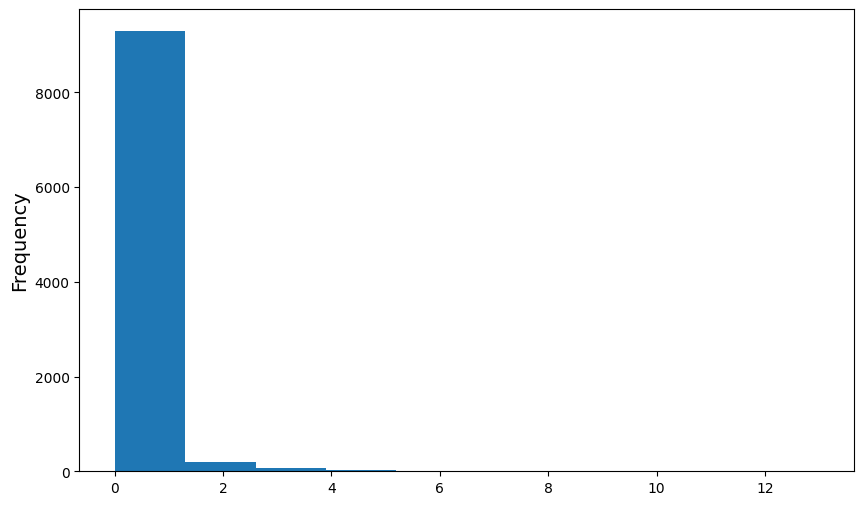

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(loan_data['delinq.2yrs'], bins=10, edgecolor='none') 
plt.ylabel('Frequency', fontsize=14) 
plt.show()

- Common Values & Extreme Values

In [16]:
value_counts = loan_data['delinq.2yrs'].value_counts().reset_index()  
value_counts.columns = ['Value', 'Count']  
value_counts['Frequency (%)'] = (value_counts['Count'] / value_counts['Count'].sum()) * 100  

# Top 10 Common values
top_values = value_counts.head(10)   
print("*** Top 10 Values: ***")  
print(top_values)  

min_values = value_counts.nsmallest(5, 'Value')  
max_values = value_counts.nlargest(5, 'Value')  

print("\n*** Minimum 5 values: ***")  
print(min_values)  

print("\n*** Maximum 5 values: ***")  
print(max_values)

*** Top 10 Values: ***
   Value  Count  Frequency (%)
0      0   8458      88.306536
1      1    832       8.686573
2      2    192       2.004594
3      3     65       0.678639
4      4     19       0.198371
5      5      6       0.062644
6      6      2       0.020881
7     13      1       0.010441
8      7      1       0.010441
9      8      1       0.010441

*** Minimum 5 values: ***
   Value  Count  Frequency (%)
0      0   8458      88.306536
1      1    832       8.686573
2      2    192       2.004594
3      3     65       0.678639
4      4     19       0.198371

*** Maximum 5 values: ***
    Value  Count  Frequency (%)
7      13      1       0.010441
10     11      1       0.010441
9       8      1       0.010441
8       7      1       0.010441
6       6      2       0.020881


##### dti
-  Statistics 

In [17]:
print("*** Quantile statistics ***")
dti_insu = descriptive_insurance(loan_data, 'dti')
print(f"Min: {dti_insu['Min']}")
print(f"Q1: {dti_insu['Q1']}")
print(f"Median: {dti_insu['Median']:.2f}")
print(f"Q3: {dti_insu['Q3']}")
print(f"Max: {dti_insu['Max']}")
print(f"Range: {dti_insu['Range']}")
print(f"IQR: {dti_insu['IQR']}")

print("\n*** Descriptive statistics ***")
print(f"Std Dev: {dti_insu['Std Dev']:.2f}")
print(f"Coefficient of Variation: {dti_insu['Coefficient of Variation']:.2f}")
print(f"Kurtosis: {dti_insu['Kurtosis']:.2f}")
print(f"Mean: {dti_insu['Mean']:.2f}")
print(f"Skewness: {dti_insu['Skewness']:.2f}")
print(f"SUM: {dti_insu['SUM']}") 
print(f"Variance: {dti_insu['Variance']:.2f}")  
print(f"Memory Size: {dti_insu['Memory Size']} bytes")  

*** Quantile statistics ***
Min: 0.0
Q1: 7.2125
Median: 12.66
Q3: 17.95
Max: 29.96
Range: 29.96
IQR: 10.737499999999999

*** Descriptive statistics ***
Std Dev: 6.88
Coefficient of Variation: 0.55
Kurtosis: -0.90
Mean: 12.61
Skewness: 0.02
SUM: 120746.77
Variance: 47.39
Memory Size: 76756 bytes


- Histogram

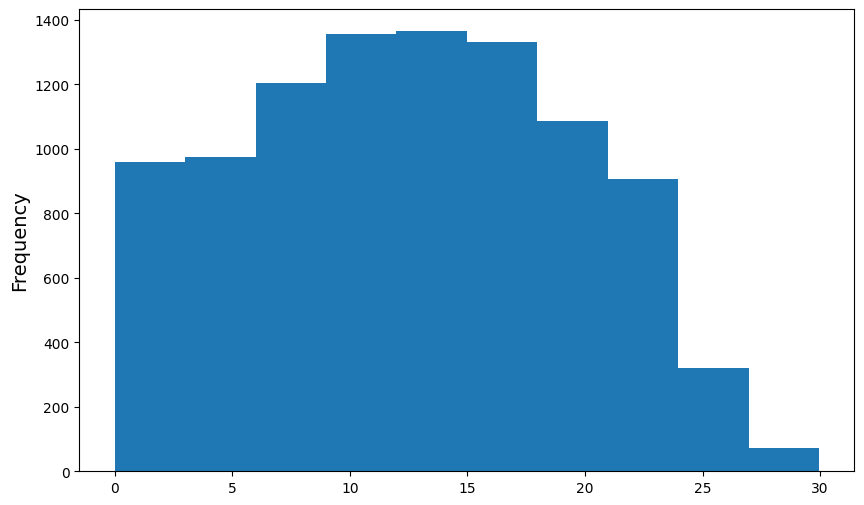

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(loan_data['dti'], bins=10, edgecolor='none')
plt.ylabel('Frequency', fontsize=14) 
plt.show()

- Common Values & Extreme Values

In [19]:
value_counts = loan_data['dti'].value_counts().reset_index()  
value_counts.columns = ['Value', 'Count']  
value_counts['Frequency (%)'] = (value_counts['Count'] / value_counts['Count'].sum()) * 100  

# Top 10 Common values
top_values = value_counts.head(10)   
print("*** Top 10 Values: ***")  
print(top_values)  

min_values = value_counts.nsmallest(5, 'Value')  
max_values = value_counts.nlargest(5, 'Value')  

print("\n*** Minimum 5 values: ***")  
print(min_values)  

print("\n*** Maximum 5 values: ***")  
print(max_values)

*** Top 10 Values: ***
   Value  Count  Frequency (%)
0   0.00     89       0.929213
1  10.00     19       0.198371
2   0.60     16       0.167049
3  19.20     13       0.135728
4  12.00     13       0.135728
5   6.00     13       0.135728
6  13.16     13       0.135728
7  15.10     13       0.135728
8  15.60     12       0.125287
9  10.80     12       0.125287

*** Minimum 5 values: ***
      Value  Count  Frequency (%)
0      0.00     89       0.929213
2295   0.01      1       0.010441
2313   0.02      1       0.010441
2194   0.03      1       0.010441
1798   0.04      2       0.020881

*** Maximum 5 values: ***
      Value  Count  Frequency (%)
2443  29.96      1       0.010441
2495  29.95      1       0.010441
2189  29.90      1       0.010441
2206  29.74      1       0.010441
2485  29.72      1       0.010441



##### fico 
- Statistics

In [20]:
print("*** Quantile statistics ***")
fico_insu = descriptive_insurance(loan_data, 'fico')
print(f"Min: {fico_insu['Min']}")
print(f"Q1: {fico_insu['Q1']}")
print(f"Median: {fico_insu['Median']:.2f}")
print(f"Q3: {fico_insu['Q3']}")
print(f"Max: {fico_insu['Max']}")
print(f"Range: {fico_insu['Range']}")
print(f"IQR: {fico_insu['IQR']}")

print("\n*** Descriptive statistics ***")
print(f"Std Dev: {fico_insu['Std Dev']:.2f}")
print(f"Coefficient of Variation: {fico_insu['Coefficient of Variation']:.2f}")
print(f"Kurtosis: {fico_insu['Kurtosis']:.2f}")
print(f"Mean: {fico_insu['Mean']:.2f}")
print(f"Skewness: {fico_insu['Skewness']:.2f}")
print(f"SUM: {fico_insu['SUM']}") 
print(f"Variance: {fico_insu['Variance']:.2f}")  
print(f"Memory Size: {fico_insu['Memory Size']} bytes")  

*** Quantile statistics ***
Min: 612
Q1: 682.0
Median: 707.00
Q3: 737.0
Max: 827
Range: 215
IQR: 55.0

*** Descriptive statistics ***
Std Dev: 37.97
Coefficient of Variation: 0.05
Kurtosis: -0.42
Mean: 710.85
Skewness: 0.47
SUM: 6808486
Variance: 1441.76
Memory Size: 76756 bytes


- Histogram

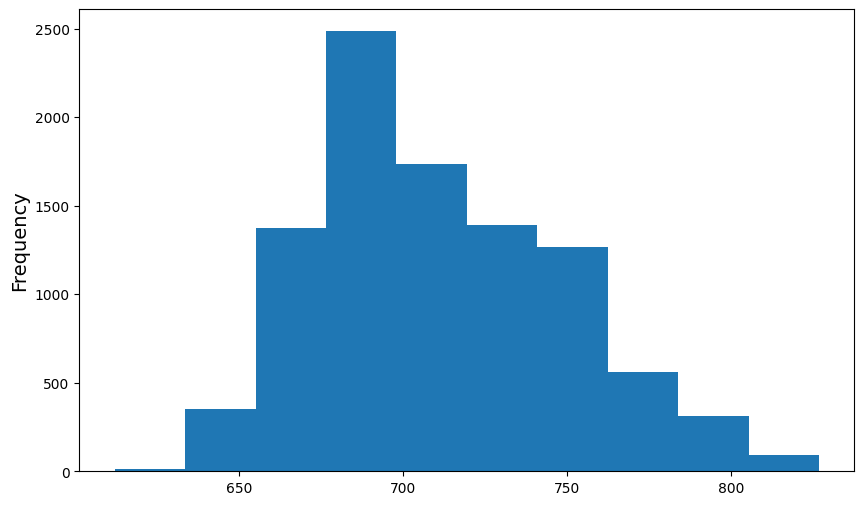

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(loan_data['fico'], bins=10, edgecolor='none')
plt.ylabel('Frequency', fontsize=14) 
plt.show()

-  Common Values & Extreme Values

In [22]:
value_counts = loan_data['fico'].value_counts().reset_index()  
value_counts.columns = ['Value', 'Count']  
value_counts['Frequency (%)'] = (value_counts['Count'] / value_counts['Count'].sum()) * 100  

# Top 10 Common values
top_values = value_counts.head(10)   
print("*** Top 10 Values: ***")  
print(top_values)  

min_values = value_counts.nsmallest(5, 'Value')  
max_values = value_counts.nlargest(5, 'Value')  

print("\n*** Minimum 5 values: ***")  
print(min_values)  

print("\n*** Maximum 5 values: ***")  
print(max_values)

*** Top 10 Values: ***
   Value  Count  Frequency (%)
0    687    548       5.721445
1    682    536       5.596158
2    692    498       5.199415
3    697    476       4.969722
4    702    472       4.927960
5    707    444       4.635623
6    667    438       4.572980
7    677    427       4.458133
8    717    424       4.426811
9    662    414       4.322406

*** Minimum 5 values: ***
    Value  Count  Frequency (%)
40    612      2       0.020881
42    617      1       0.010441
43    622      1       0.010441
39    627      2       0.020881
35    632      6       0.062644

*** Maximum 5 values: ***
    Value  Count  Frequency (%)
41    827      1       0.010441
38    822      5       0.052203
36    817      6       0.062644
34    812     33       0.344540
33    807     45       0.469827



##### inq.last.6mths
- Statistics

In [23]:
print("*** Quantile statistics ***")
inq_insu = descriptive_insurance(loan_data, 'inq.last.6mths')
print(f"Min: {inq_insu['Min']}")
print(f"Q1: {inq_insu['Q1']}")
print(f"Median: {inq_insu['Median']:.2f}")
print(f"Q3: {inq_insu['Q3']}")
print(f"Max: {inq_insu['Max']}")
print(f"Range: {inq_insu['Range']}")
print(f"IQR: {inq_insu['IQR']}")

print("\n*** Descriptive statistics ***")
print(f"Std Dev: {inq_insu['Std Dev']:.2f}")
print(f"Coefficient of Variation: {inq_insu['Coefficient of Variation']:.2f}")
print(f"Kurtosis: {inq_insu['Kurtosis']:.2f}")
print(f"Mean: {inq_insu['Mean']:.2f}")
print(f"Skewness: {inq_insu['Skewness']:.2f}")
print(f"SUM: {inq_insu['SUM']}") 
print(f"Variance: {inq_insu['Variance']:.2f}")  
print(f"Memory Size: {inq_insu['Memory Size']} bytes")  

*** Quantile statistics ***
Min: 0
Q1: 0.0
Median: 1.00
Q3: 2.0
Max: 33
Range: 33
IQR: 2.0

*** Descriptive statistics ***
Std Dev: 2.20
Coefficient of Variation: 1.39
Kurtosis: 26.29
Mean: 1.58
Skewness: 3.58
SUM: 15109
Variance: 4.84
Memory Size: 76756 bytes


- Histogram

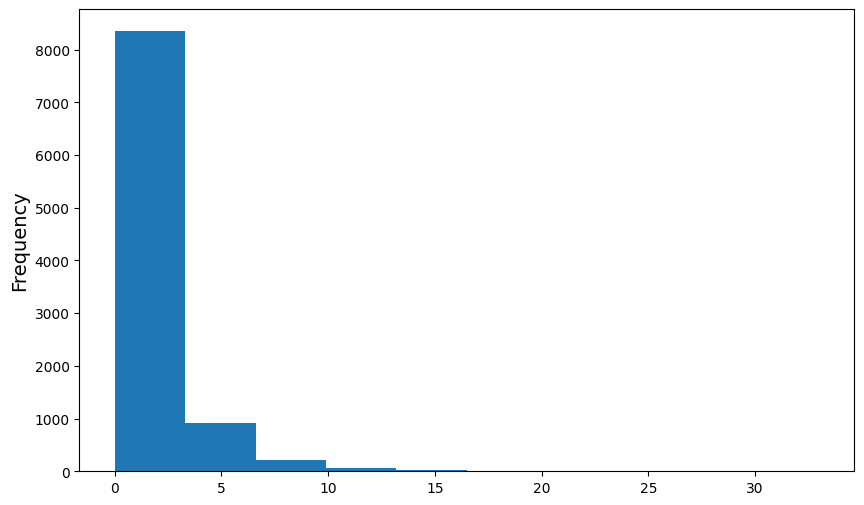

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(loan_data['inq.last.6mths'], bins=10, edgecolor='none')
plt.ylabel('Frequency', fontsize=14) 
plt.show()

- Common Values & Extreme Values

In [25]:
value_counts = loan_data['inq.last.6mths'].value_counts().reset_index()  
value_counts.columns = ['Value', 'Count']  
value_counts['Frequency (%)'] = (value_counts['Count'] / value_counts['Count'].sum()) * 100  

# Top 10 Common values
top_values = value_counts.head(10)   
print("*** Top 10 Values: ***")  
print(top_values)  

min_values = value_counts.nsmallest(5, 'Value')  
max_values = value_counts.nlargest(5, 'Value')  

print("\n*** Minimum 5 values: ***")  
print(min_values)  

print("\n*** Maximum 5 values: ***")  
print(max_values)

*** Top 10 Values: ***
   Value  Count  Frequency (%)
0      0   3637      37.972437
1      1   2462      25.704740
2      2   1384      14.449781
3      3    864       9.020672
4      4    475       4.959282
5      5    278       2.902485
6      6    165       1.722698
7      7    100       1.044059
8      8     72       0.751723
9      9     47       0.490708

*** Minimum 5 values: ***
   Value  Count  Frequency (%)
0      0   3637      37.972437
1      1   2462      25.704740
2      2   1384      14.449781
3      3    864       9.020672
4      4    475       4.959282

*** Maximum 5 values: ***
    Value  Count  Frequency (%)
21     33      1       0.010441
27     32      1       0.010441
26     31      1       0.010441
24     28      1       0.010441
23     27      1       0.010441

   Value  Count  Frequency (%)
0      0   3637      37.972437
1      1   2462      25.704740
2      2   1384      14.449781
3      3    864       9.020672
4      4    475       4.959282
5      5    278  


#####  installment
- Statistics

In [26]:
print("*** Quantile statistics ***")
ins_insu = descriptive_insurance(loan_data, 'installment')
print(f"Min: {ins_insu['Min']}")
print(f"Q1: {ins_insu['Q1']}")
print(f"Median: {ins_insu['Median']:.2f}")
print(f"Q3: {ins_insu['Q3']}")
print(f"Max: {ins_insu['Max']}")
print(f"Range: {ins_insu['Range']}")
print(f"IQR: {ins_insu['IQR']}")

print("\n*** Descriptive statistics ***")
print(f"Std Dev: {ins_insu['Std Dev']:.2f}")
print(f"Coefficient of Variation: {ins_insu['Coefficient of Variation']:.2f}")
print(f"Kurtosis: {ins_insu['Kurtosis']:.2f}")
print(f"Mean: {ins_insu['Mean']:.2f}")
print(f"Skewness: {ins_insu['Skewness']:.2f}")
print(f"SUM: {ins_insu['SUM']}") 
print(f"Variance: {ins_insu['Variance']:.2f}")  
print(f"Memory Size: {ins_insu['Memory Size']} bytes")  

*** Quantile statistics ***
Min: 15.67
Q1: 163.77
Median: 268.95
Q3: 432.7625
Max: 940.14
Range: 924.47
IQR: 268.99249999999995

*** Descriptive statistics ***
Std Dev: 207.07
Coefficient of Variation: 0.65
Kurtosis: 0.14
Mean: 319.09
Skewness: 0.91
SUM: 3056238.4
Variance: 42878.52
Memory Size: 76756 bytes


- Histogram

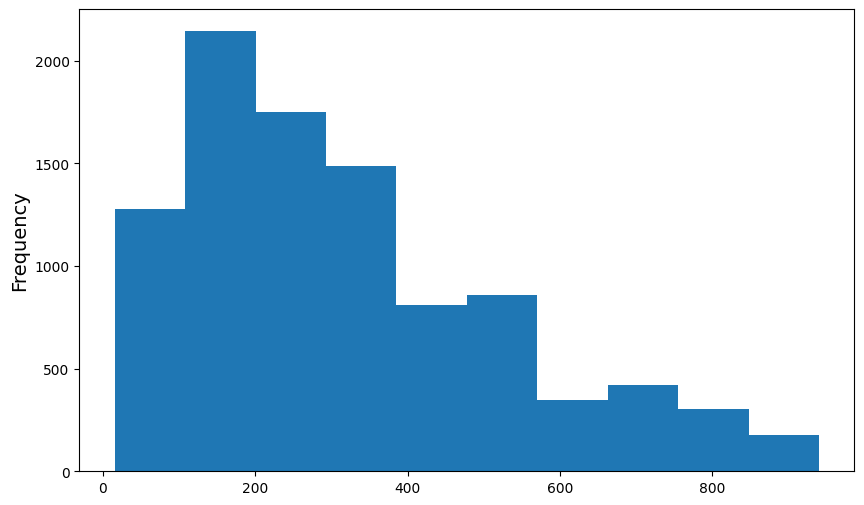

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(loan_data['installment'], bins=10, edgecolor='none')
plt.ylabel('Frequency', fontsize=14) 
plt.show()

- Common Values & Extreme Values

In [28]:
value_counts = loan_data['installment'].value_counts().reset_index()  
value_counts.columns = ['Value', 'Count']  
value_counts['Frequency (%)'] = (value_counts['Count'] / value_counts['Count'].sum()) * 100  

# Top 10 Common values
top_values = value_counts.head(10)   
print("*** Top 10 Values: ***")  
print(top_values)  

min_values = value_counts.nsmallest(5, 'Value')  
max_values = value_counts.nlargest(5, 'Value')  

print("\n*** Minimum 5 values: ***")  
print(min_values)  

print("\n*** Maximum 5 values: ***")  
print(max_values)

*** Top 10 Values: ***
    Value  Count  Frequency (%)
0  317.72     41       0.428064
1  316.11     34       0.354980
2  319.47     29       0.302777
3  381.26     27       0.281896
4  662.68     27       0.281896
5  156.10     24       0.250574
6  320.95     24       0.250574
7  669.33     23       0.240134
8  334.67     23       0.240134
9  188.02     23       0.240134

*** Minimum 5 values: ***
      Value  Count  Frequency (%)
4300  15.67      1       0.010441
3834  15.69      1       0.010441
4370  15.75      1       0.010441
3876  15.76      1       0.010441
3934  15.91      1       0.010441

*** Maximum 5 values: ***
       Value  Count  Frequency (%)
4723  940.14      1       0.010441
863   926.83      2       0.020881
4787  922.42      1       0.010441
1052  918.02      2       0.020881
1373  916.95      2       0.020881



##### int.rate
- Statistics

In [29]:
print("*** Quantile statistics ***")
int_insu = descriptive_insurance(loan_data, 'int.rate')
print(f"Min: {int_insu['Min']}")
print(f"Q1: {int_insu['Q1']}")
print(f"Median: {int_insu['Median']:.2f}")
print(f"Q3: {int_insu['Q3']}")
print(f"Max: {int_insu['Max']}")
print(f"Range: {int_insu['Range']}")
print(f"IQR: {int_insu['IQR']}")

print("\n*** Descriptive statistics ***")
print(f"Std Dev: {int_insu['Std Dev']:.2f}")
print(f"Coefficient of Variation: {int_insu['Coefficient of Variation']:.2f}")
print(f"Kurtosis: {int_insu['Kurtosis']:.2f}")
print(f"Mean: {int_insu['Mean']:.2f}")
print(f"Skewness: {int_insu['Skewness']:.2f}")
print(f"SUM: {int_insu['SUM']}") 
print(f"Variance: {int_insu['Variance']:.2f}")  
print(f"Memory Size: {int_insu['Memory Size']} bytes")  

*** Quantile statistics ***
Min: 0.06
Q1: 0.1039
Median: 0.12
Q3: 0.1407
Max: 0.2164
Range: 0.1564
IQR: 0.036799999999999986

*** Descriptive statistics ***
Std Dev: 0.03
Coefficient of Variation: 0.22
Kurtosis: -0.22
Mean: 0.12
Skewness: 0.16
SUM: 1174.6465
Variance: 0.00
Memory Size: 76756 bytes


- Histogram

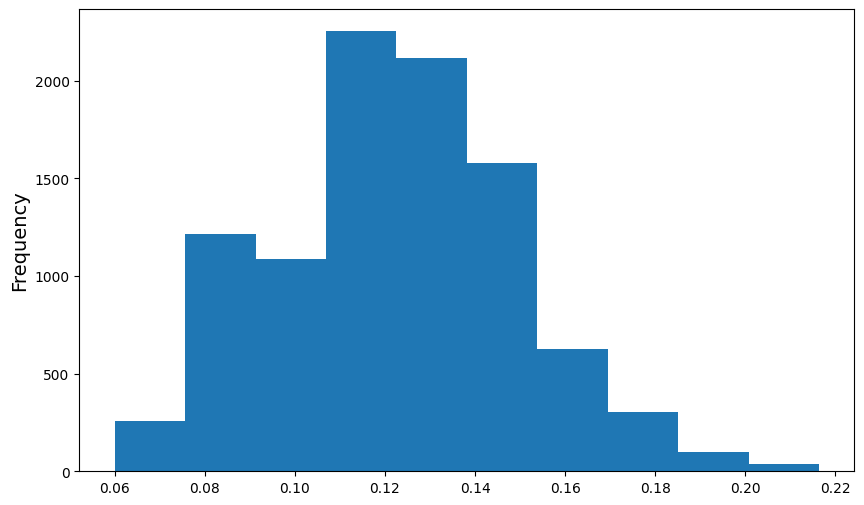

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(loan_data['int.rate'], bins=10, edgecolor='none')
plt.ylabel('Frequency', fontsize=14) 
plt.show()

- Common Values & Extreme Values

In [31]:
value_counts = loan_data['int.rate'].value_counts().reset_index()  
value_counts.columns = ['Value', 'Count']  
value_counts['Frequency (%)'] = (value_counts['Count'] / value_counts['Count'].sum()) * 100  

# Top 10 Common values
top_values = value_counts.head(10)   
print("*** Top 10 Values: ***")  
print(top_values)  

min_values = value_counts.nsmallest(5, 'Value')  
max_values = value_counts.nlargest(5, 'Value')  

print("\n*** Minimum 5 values: ***")  
print(min_values)  

print("\n*** Maximum 5 values: ***")  
print(max_values)

*** Top 10 Values: ***
    Value  Count  Frequency (%)
0  0.1253    354       3.695970
1  0.0894    299       3.121737
2  0.1183    243       2.537064
3  0.1218    215       2.244728
4  0.0963    210       2.192525
5  0.1114    206       2.150762
6  0.0800    198       2.067237
7  0.1287    197       2.056797
8  0.1148    193       2.015034
9  0.0859    187       1.952391

*** Minimum 5 values: ***
      Value  Count  Frequency (%)
184  0.0600      8       0.083525
220  0.0639      4       0.041762
165  0.0676      9       0.093965
103  0.0705     23       0.240134
173  0.0712      9       0.093965

*** Maximum 5 values: ***
      Value  Count  Frequency (%)
229  0.2164      2       0.020881
190  0.2121      7       0.073084
232  0.2090      2       0.020881
203  0.2086      6       0.062644
219  0.2052      4       0.041762


##### log.annual.inc
- Statistics

In [32]:
print("*** Quantile statistics ***")
log_insu = descriptive_insurance(loan_data, 'log.annual.inc')
print(f"Min: {log_insu['Min']}")
print(f"Q1: {log_insu['Q1']}")
print(f"Median: {log_insu['Median']:.2f}")
print(f"Q3: {log_insu['Q3']}")
print(f"Max: {log_insu['Max']}")
print(f"Range: {log_insu['Range']}")
print(f"IQR: {log_insu['IQR']}")

print("\n*** Descriptive statistics ***")
print(f"Std Dev: {log_insu['Std Dev']:.2f}")
print(f"Coefficient of Variation: {log_insu['Coefficient of Variation']:.2f}")
print(f"Kurtosis: {log_insu['Kurtosis']:.2f}")
print(f"Mean: {log_insu['Mean']:.2f}")
print(f"Skewness: {log_insu['Skewness']:.2f}")
print(f"SUM: {log_insu['SUM']}") 
print(f"Variance: {log_insu['Variance']:.2f}")  
print(f"Memory Size: {log_insu['Memory Size']} bytes")  

*** Quantile statistics ***
Min: 7.547501683
Q1: 10.55841352
Median: 10.93
Q3: 11.2912929175
Max: 14.52835448
Range: 6.980852797000001
IQR: 0.7328793974999996

*** Descriptive statistics ***
Std Dev: 0.61
Coefficient of Variation: 0.06
Kurtosis: 1.61
Mean: 10.93
Skewness: 0.03
SUM: 104707.81794585098
Variance: 0.38
Memory Size: 76756 bytes


- Histogram

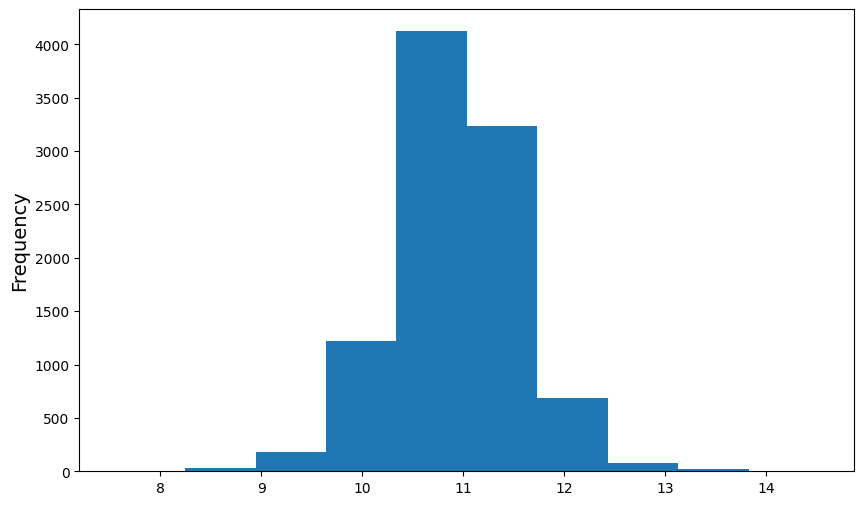

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(loan_data['log.annual.inc'], bins=10, edgecolor='none')
plt.ylabel('Frequency', fontsize=14)
plt.show()

- Common Values & Extreme Values

In [34]:
value_counts = loan_data['log.annual.inc'].value_counts().reset_index()  
value_counts.columns = ['Value', 'Count']  
value_counts['Frequency (%)'] = (value_counts['Count'] / value_counts['Count'].sum()) * 100  

# Top 10 Common values
top_values = value_counts.head(10)   
print("*** Top 10 Values: ***")  
print(top_values)  

min_values = value_counts.nsmallest(5, 'Value')  
max_values = value_counts.nlargest(5, 'Value')  

print("\n*** Minimum 5 values: ***")  
print(min_values)  

print("\n*** Maximum 5 values: ***")  
print(max_values)

*** Top 10 Values: ***
       Value  Count  Frequency (%)
0  11.002100    308       3.215703
1  10.819778    248       2.589267
2  10.596635    224       2.338693
3  10.308953    224       2.338693
4  10.714418    221       2.307371
5  11.225243    196       2.046356
6  11.156251    165       1.722698
7  10.778956    149       1.555648
8  10.915088    147       1.534767
9  11.082143    146       1.524327

*** Minimum 5 values: ***
         Value  Count  Frequency (%)
1734  7.547502      1       0.010441
1755  7.600902      1       0.010441
1815  8.101678      1       0.010441
1788  8.160518      1       0.010441
1825  8.188689      1       0.010441

*** Maximum 5 values: ***
          Value  Count  Frequency (%)
1225  14.528354      1       0.010441
1421  14.180154      1       0.010441
1376  14.124465      1       0.010441
1536  13.997832      1       0.010441
458   13.710150      2       0.020881


- not.fully.paid

In [35]:
print(f"Mean: {loan_data['not.fully.paid'].mean():.2f}\n")
print(loan_data['not.fully.paid'].value_counts())

print('\nToggle details')
print(loan_data['not.fully.paid'].value_counts(normalize=True)*100)

Mean: 0.16

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

Toggle details
not.fully.paid
0    83.994571
1    16.005429
Name: proportion, dtype: float64


##### pub.rec
- Statistics

In [36]:
print("*** Quantile statistics ***")
pubr_insu = descriptive_insurance(loan_data, 'pub.rec')
print(f"Min: {pubr_insu['Min']}")
print(f"Q1: {pubr_insu['Q1']}")
print(f"Median: {pubr_insu['Median']:.2f}")
print(f"Q3: {pubr_insu['Q3']}")
print(f"Max: {pubr_insu['Max']}")
print(f"Range: {pubr_insu['Range']}")
print(f"IQR: {pubr_insu['IQR']}")

print("\n*** Descriptive statistics ***")
print(f"Std Dev: {pubr_insu['Std Dev']:.2f}")
print(f"Coefficient of Variation: {pubr_insu['Coefficient of Variation']:.2f}")
print(f"Kurtosis: {pubr_insu['Kurtosis']:.2f}")
print(f"Mean: {pubr_insu['Mean']:.2f}")
print(f"Skewness: {pubr_insu['Skewness']:.2f}")
print(f"SUM: {pubr_insu['SUM']}") 
print(f"Variance: {pubr_insu['Variance']:.2f}")  
print(f"Memory Size: {pubr_insu['Memory Size']} bytes")  

*** Quantile statistics ***
Min: 0
Q1: 0.0
Median: 0.00
Q3: 0.0
Max: 5
Range: 5
IQR: 0.0

*** Descriptive statistics ***
Std Dev: 0.26
Coefficient of Variation: 4.22
Kurtosis: 38.78
Mean: 0.06
Skewness: 5.13
SUM: 595
Variance: 0.07
Memory Size: 76756 bytes


- Histogram

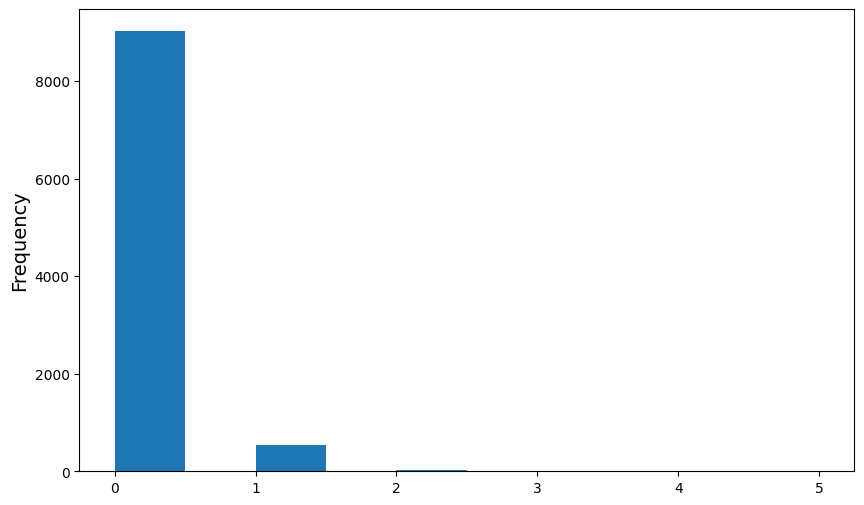

In [37]:
plt.figure(figsize=(10, 6))
plt.hist(loan_data['pub.rec'], bins=10, edgecolor='none')
plt.ylabel('Frequency', fontsize=14)
plt.show()

- Common Values & Extreme Values

In [38]:
value_counts = loan_data['pub.rec'].value_counts().reset_index()  
value_counts.columns = ['Value', 'Count']  
value_counts['Frequency (%)'] = (value_counts['Count'] / value_counts['Count'].sum()) * 100  

# Top 10 Common values
top_values = value_counts.head(10)   
print("*** Top 10 Values: ***")  
print(top_values)  

min_values = value_counts.nsmallest(5, 'Value')  
max_values = value_counts.nlargest(5, 'Value')  

print("\n*** Minimum 5 values: ***")  
print(min_values)  

print("\n*** Maximum 5 values: ***")  
print(max_values)

*** Top 10 Values: ***
   Value  Count  Frequency (%)
0      0   9019      94.163708
1      1    533       5.564836
2      2     19       0.198371
3      3      5       0.052203
4      4      1       0.010441
5      5      1       0.010441

*** Minimum 5 values: ***
   Value  Count  Frequency (%)
0      0   9019      94.163708
1      1    533       5.564836
2      2     19       0.198371
3      3      5       0.052203
4      4      1       0.010441

*** Maximum 5 values: ***
   Value  Count  Frequency (%)
5      5      1       0.010441
4      4      1       0.010441
3      3      5       0.052203
2      2     19       0.198371
1      1    533       5.564836


- purpopse


Statistics for 'purpose':

                Value  Count  Frequency (%)
0  debt_consolidation   3957      41.313427
1           all_other   2331      24.337022
2         credit_card   1262      13.176028
3    home_improvement    629       6.567133
4      small_business    619       6.462727
5      major_purchase    437       4.562539
6         educational    343       3.581123

Distinct count: 7
Missing: 0


C:\Users\aSvNguyen\AppData\Local\Temp\ipykernel_17108\4094006584.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, y='Value', x='Count', palette='viridis')


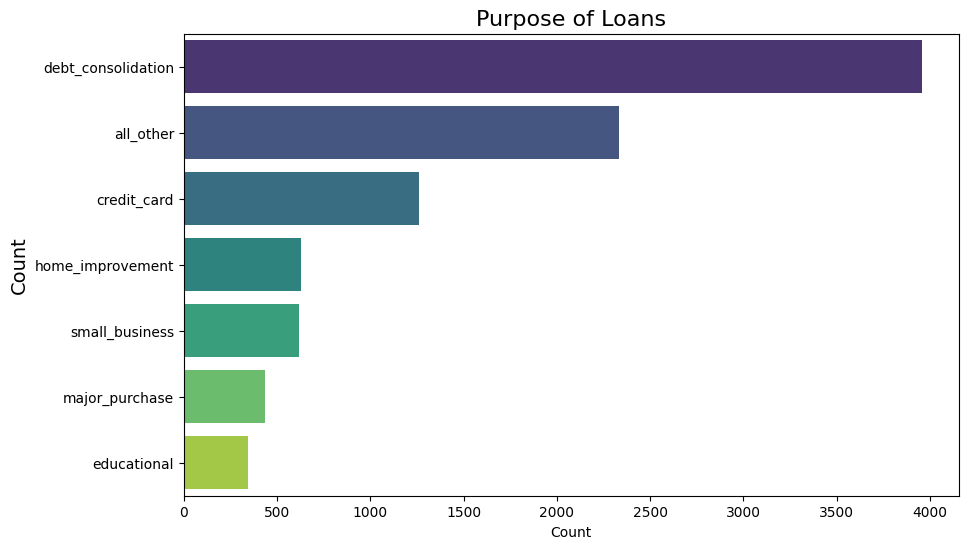

In [39]:
value_counts = loan_data['purpose'].value_counts().reset_index()  
value_counts.columns = ['Value', 'Count']  
value_counts['Frequency (%)'] = (value_counts['Count'] / value_counts['Count'].sum()) * 100  

# Statistics
print("\nStatistics for 'purpose':\n")  
print(value_counts)  
print(f"\nDistinct count: {loan_data['purpose'].nunique()}")  
print(f"Missing: {loan_data['purpose'].isnull().sum()}")  

# Histogram
plt.figure(figsize=(10, 6))  
sns.barplot(data=value_counts, y='Value', x='Count', palette='viridis')  
plt.title('Purpose of Loans', fontsize=16)   
plt.ylabel('Count', fontsize=14)  
plt.show()

In [40]:
value_counts

,Value,Count,Frequency (%)
0,debt_consolidation,3957,41.313427
1,all_other,2331,24.337022
2,credit_card,1262,13.176028
3,home_improvement,629,6.567133
4,small_business,619,6.462727
5,major_purchase,437,4.562539
6,educational,343,3.581123



##### revol.bal
- Statistics

In [41]:
print("*** Quantile statistics ***")
reb_insu = descriptive_insurance(loan_data, 'revol.bal')
print(f"Min: {reb_insu['Min']}")
print(f"Q1: {reb_insu['Q1']}")
print(f"Median: {reb_insu['Median']:.2f}")
print(f"Q3: {reb_insu['Q3']}")
print(f"Max: {reb_insu['Max']}")
print(f"Range: {reb_insu['Range']}")
print(f"IQR: {reb_insu['IQR']}")

print("\n*** Descriptive statistics ***")
print(f"Std Dev: {reb_insu['Std Dev']:.2f}")
print(f"Coefficient of Variation: {reb_insu['Coefficient of Variation']:.2f}")
print(f"Kurtosis: {reb_insu['Kurtosis']:.2f}")
print(f"Mean: {reb_insu['Mean']:.2f}")
print(f"Skewness: {reb_insu['Skewness']:.2f}")
print(f"SUM: {reb_insu['SUM']}") 
print(f"Variance: {reb_insu['Variance']:.2f}")  
print(f"Memory Size: {reb_insu['Memory Size']} bytes")  

*** Quantile statistics ***
Min: 0
Q1: 3187.0
Median: 8596.00
Q3: 18249.5
Max: 1207359
Range: 1207359
IQR: 15062.5

*** Descriptive statistics ***
Std Dev: 33756.19
Coefficient of Variation: 2.00
Kurtosis: 259.66
Mean: 16913.96
Skewness: 11.16
SUM: 162001946
Variance: 1139480333.43
Memory Size: 76756 bytes


- Histogram

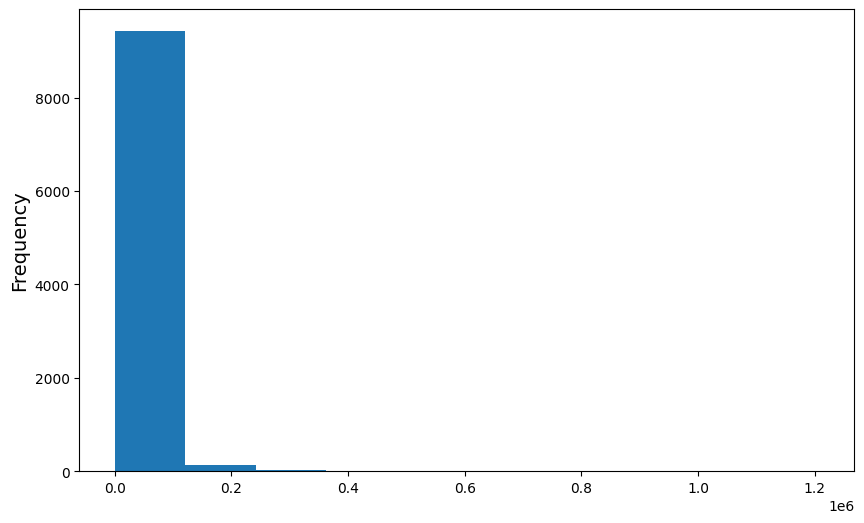

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(loan_data['revol.bal'], bins=10, edgecolor='none')
plt.ylabel('Frequency', fontsize=14)
plt.show()

- Common Values & Extreme Values

In [43]:
value_counts = loan_data['revol.bal'].value_counts().reset_index()  
value_counts.columns = ['Value', 'Count']  
value_counts['Frequency (%)'] = (value_counts['Count'] / value_counts['Count'].sum()) * 100  

# Top 10 Common values
top_values = value_counts.head(10)   
print("*** Top 10 Values: ***")  
print(top_values)  

min_values = value_counts.nsmallest(5, 'Value')  
max_values = value_counts.nlargest(5, 'Value')  

print("\n*** Minimum 5 values: ***")  
print(min_values)  

print("\n*** Maximum 5 values: ***")  
print(max_values)

*** Top 10 Values: ***
   Value  Count  Frequency (%)
0      0    321       3.351430
1    255     10       0.104406
2    298     10       0.104406
3    682      9       0.093965
4    346      8       0.083525
5   2229      6       0.062644
6   1085      6       0.062644
7    182      6       0.062644
8   8035      5       0.052203
9      1      5       0.052203

*** Minimum 5 values: ***
      Value  Count  Frequency (%)
0         0    321       3.351430
9         1      5       0.052203
590       2      2       0.020881
6023      3      1       0.010441
423       4      2       0.020881

*** Maximum 5 values: ***
        Value  Count  Frequency (%)
7832  1207359      1       0.010441
7472   952013      1       0.010441
7667   602519      1       0.010441
7543   508961      1       0.010441
6742   407794      1       0.010441



##### revol.util
- Statistics

In [44]:
print("*** Quantile statistics ***")
reu_insu = descriptive_insurance(loan_data, 'revol.util')
print(f"Min: {reu_insu['Min']}")
print(f"Q1: {reu_insu['Q1']}")
print(f"Median: {reu_insu['Median']:.2f}")
print(f"Q3: {reu_insu['Q3']}")
print(f"Max: {reu_insu['Max']}")
print(f"Range: {reu_insu['Range']}")
print(f"IQR: {reu_insu['IQR']}")

print("\n*** Descriptive statistics ***")
print(f"Std Dev: {reu_insu['Std Dev']:.2f}")
print(f"Coefficient of Variation: {reu_insu['Coefficient of Variation']:.2f}")
print(f"Kurtosis: {reu_insu['Kurtosis']:.2f}")
print(f"Mean: {reu_insu['Mean']:.2f}")
print(f"Skewness: {reu_insu['Skewness']:.2f}")
print(f"SUM: {reu_insu['SUM']}") 
print(f"Variance: {reu_insu['Variance']:.2f}")  
print(f"Memory Size: {reu_insu['Memory Size']} bytes")  

*** Quantile statistics ***
Min: 0.0
Q1: 22.6
Median: 46.30
Q3: 70.9
Max: 119.0
Range: 119.0
IQR: 48.300000000000004

*** Descriptive statistics ***
Std Dev: 29.01
Coefficient of Variation: 0.62
Kurtosis: -1.12
Mean: 46.80
Skewness: 0.06
SUM: 448243.07999999996
Variance: 841.84
Memory Size: 76756 bytes


- Histogram

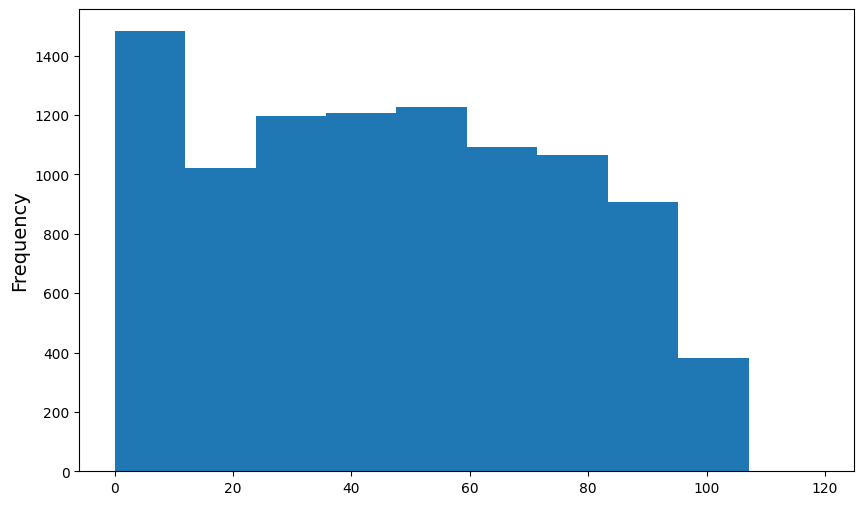

In [45]:
plt.figure(figsize=(10, 6))
plt.hist(loan_data['revol.util'], bins=10, edgecolor='none')
plt.ylabel('Frequency', fontsize=14)
plt.show()

- Common Values & Extreme Values

In [46]:
value_counts = loan_data['revol.util'].value_counts().reset_index()  
value_counts.columns = ['Value', 'Count']  
value_counts['Frequency (%)'] = (value_counts['Count'] / value_counts['Count'].sum()) * 100  

# Top 10 Common values
top_values = value_counts.head(10)   
print("*** Top 10 Values: ***")  
print(top_values)  

min_values = value_counts.nsmallest(5, 'Value')  
max_values = value_counts.nlargest(5, 'Value')  

print("\n*** Minimum 5 values: ***")  
print(min_values)  

print("\n*** Maximum 5 values: ***")  
print(max_values)

*** Top 10 Values: ***
   Value  Count  Frequency (%)
0    0.0    297       3.100856
1    0.5     26       0.271455
2   47.8     22       0.229693
3    0.3     22       0.229693
4   73.7     22       0.229693
5    0.1     21       0.219252
6    3.3     21       0.219252
7    0.7     20       0.208812
8    1.0     20       0.208812
9    0.2     20       0.208812

*** Minimum 5 values: ***
      Value  Count  Frequency (%)
0      0.00    297       3.100856
1034   0.04      1       0.010441
5      0.10     21       0.219252
9      0.20     20       0.208812
3      0.30     22       0.229693

*** Maximum 5 values: ***
      Value  Count  Frequency (%)
1012  119.0      1       0.010441
1007  108.8      1       0.010441
1028  106.5      1       0.010441
1003  106.4      1       0.010441
1030  106.2      1       0.010441


## Correlations Sample

In [47]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


- From the report, we can find a ton of useful information. I especially like the histograms of each variable as it helps give a better understand of the data and the distributions. We also can easily see that out testing variable, not.fully.paid, is not balanced. We may need to keep this in mind as we train and test our model.

- Now I'm going to explore the data by looking at how the features interact with each other.

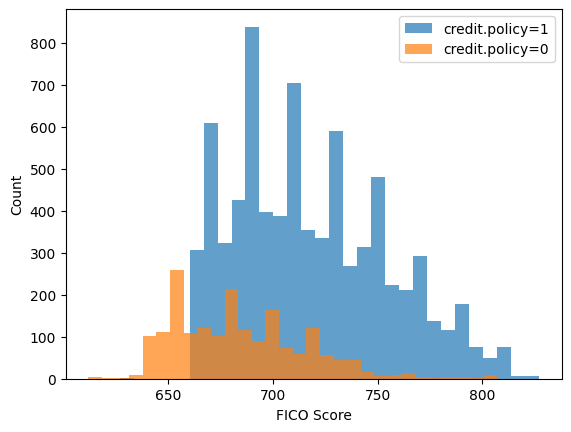

In [48]:
#FICO scores are supposed to be a good indicator of credit so let's look at that first.
#Let's look at the distribution of FICO scores for those approved to be borrowers or not.
plt.hist(loan_data[loan_data['credit.policy']==1]['fico'], alpha = 0.7, bins = 30, label='credit.policy=1')
plt.hist(loan_data[loan_data['credit.policy']==0]['fico'], alpha = 0.7, bins = 30, label='credit.policy=0')
plt.xlabel('FICO Score')
plt.ylabel('Count')
plt.legend()

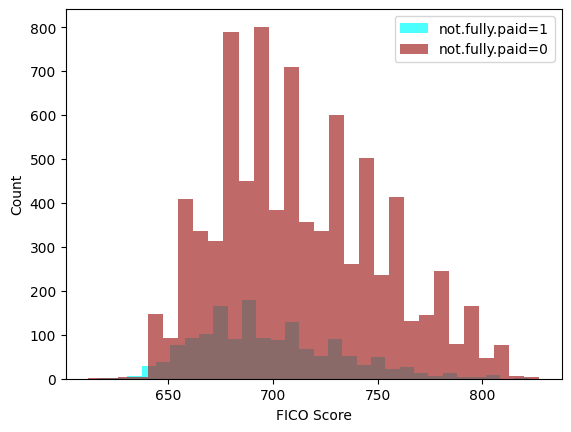

In [58]:
plt.hist(loan_data[loan_data['not.fully.paid']==1]['fico'], alpha = 0.7, bins=30, label='not.fully.paid=1', color='cyan')
plt.hist(loan_data[loan_data['not.fully.paid']==0]['fico'], alpha = 0.7, bins=30, label='not.fully.paid=0', color='brown')
plt.xlabel('FICO Score')
plt.ylabel('Count')
plt.legend()


- **not.fully.paid = 0**:
This means that the loan has been fully paid off. The borrower has paid all their debts and has no remaining balance.

- **not.fully.paid = 1**:
This indicates that the loan has not been fully repaid. The borrower still owes a portion or the entire amount of the loan. 

This may suggest that the borrower could be facing difficulties in meeting their payment obligations, which could impact their credit score.

Although there is a difference in scale, the distribution is not so different between the FICO scores and whether they paid or not.

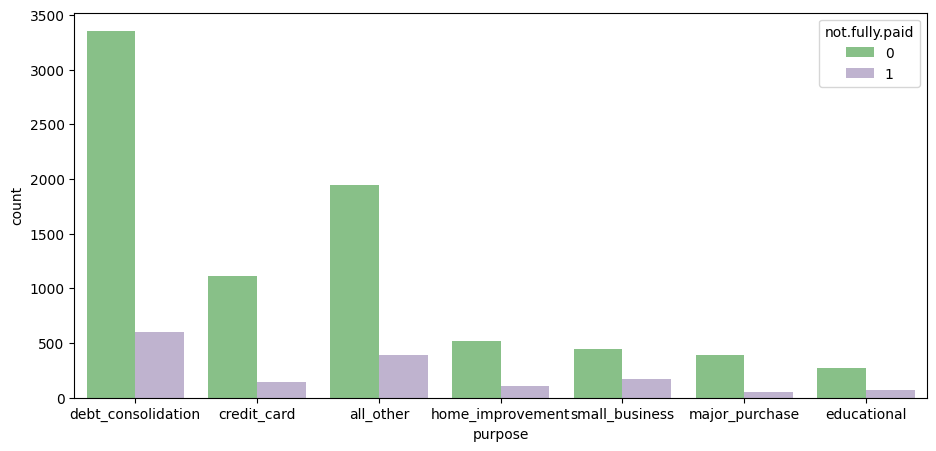

In [59]:
#Let's break it down by purpose and look at the counts for whether they paid or not
plt.figure(figsize=(11,5))
ax = sns.countplot(data=loan_data,x='purpose',hue='not.fully.paid',palette='Accent')


- We see that **debt consonlidation** is number 1 reason for wanting a loan.

 I want to see the % of each as well to see what kind of inbalance we're dealing with and to see how unbalanced certain varibles are

In [63]:
t = pd.DataFrame(loan_data.groupby('not.fully.paid')['purpose'].value_counts())
t.rename(columns= {'purpose':'count'},inplace=True)
t = t.reset_index()
result = pd.crosstab(index=t['not.fully.paid'], columns=t['purpose'], values=t['count'], aggfunc='sum', normalize='columns')
result

purpose,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
not.fully.paid,,,,,,,
0,0.833977,0.884311,0.847612,0.798834,0.829889,0.887872,0.722132
1,0.166023,0.115689,0.152388,0.201166,0.170111,0.112128,0.277868


<Axes: ylabel='purpose,not.fully.paid'>

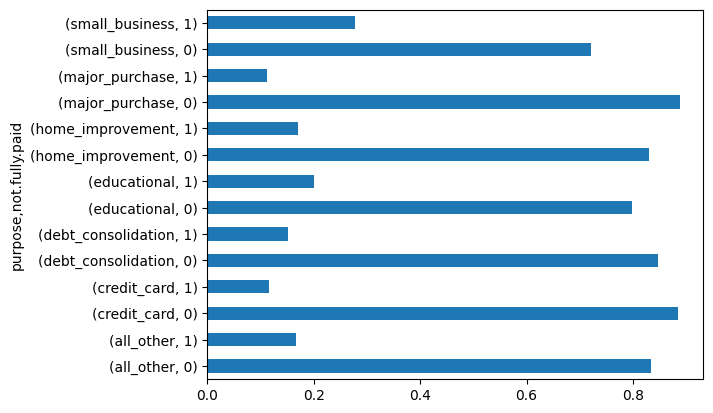

In [65]:
result.unstack().plot(kind='barh')

We see through that the unpaid loans(1) for **small businesses** are the highest compared to unpaid loans for other purposes.
 we see that the distribution of not fully paid loans(0) is pretty consistent across purposes.

AttributeError: 'JointGrid' object has no attribute 'annotate'

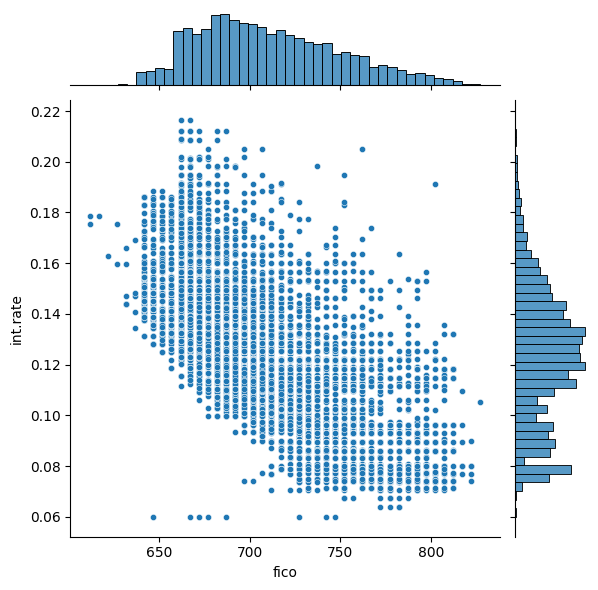

In [66]:
#I assume that FICO score and interest rate are somehow correlated so let's verify that.
g = sns.jointplot(data=loan_data,x='fico',y='int.rate', s = 20)
g = g.annotate(stats.pearsonr)

As we can see, there is a negative correlation between fico score and interest rates, as expected. Let's seperate this by whether they fully paid the loan or not and the credit policy they received.

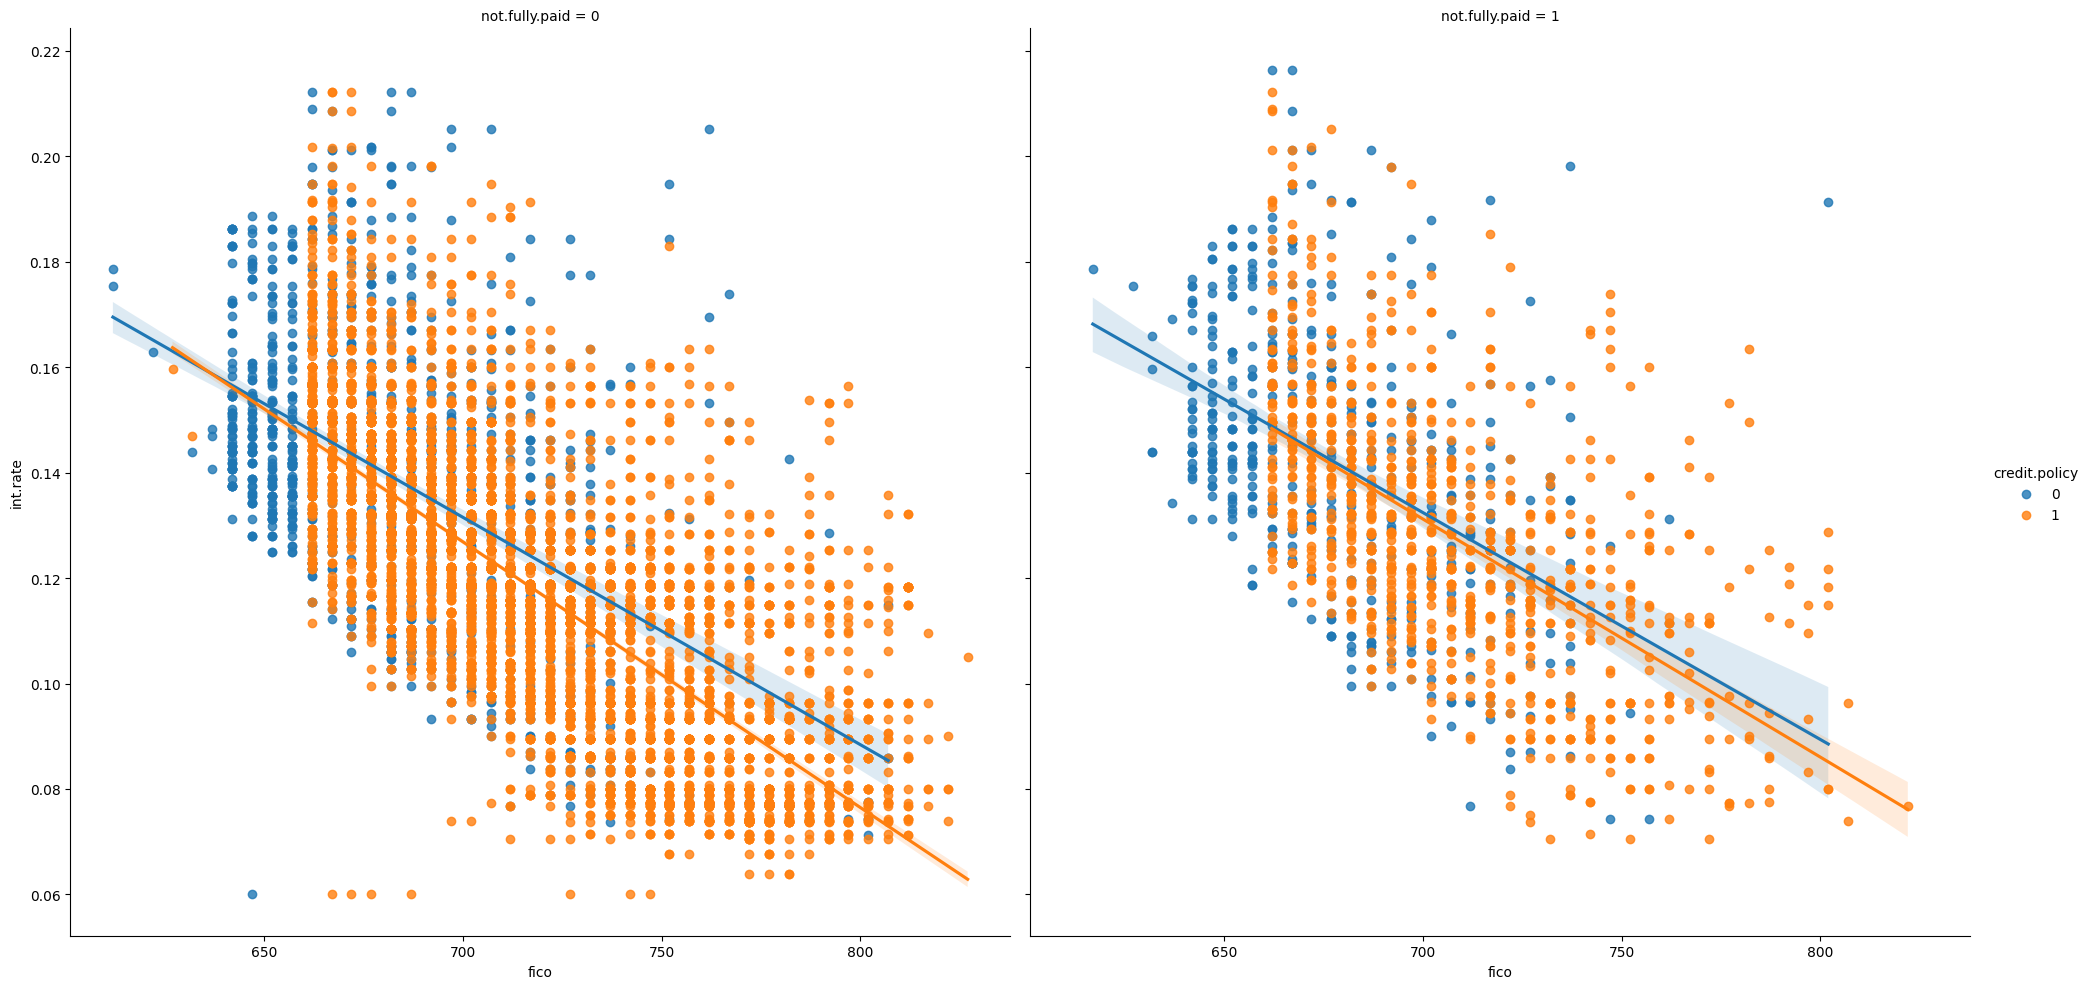

In [67]:
sns.lmplot(data=loan_data,x='fico', y='int.rate', col='not.fully.paid', hue='credit.policy', height=10)

Its clear that, from the regression line, that those who had not met the credit policy tended to have a higher interest rate than their counterparts who did meet the policy when they paid for the loan. However, there's no real difference with those who did not fully pay. Regardless, there is a clear correlation between interest rate and fico score - the higher the fico score, the lower the interest rate you received (as expected).

## Building Our Model

From our initial overview of the data, we see that we only have 1 categorical variable in our dataset. While it's not required in some decision trees/random forest algorithms, the sklearn toolkit we'll be using must take numerical values only. I'll be using one hot encoding (otherwise known as dummy variables) in order to represent this variable in the data.

In [68]:
cat_feats = ['purpose']     

In [69]:
loan_data1 = pd.get_dummies(loan_data, columns=cat_feats, drop_first=True)
loan_data1.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


In [71]:
#Split the data into training and testing
from sklearn.model_selection import train_test_split

In [74]:
X1 = loan_data1.drop('not.fully.paid', axis=1)
y1 = loan_data1['not.fully.paid']

In [75]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=101)

## Decision Tree Model
We'll start with the decission tree model

In [77]:
from sklearn.tree import DecisionTreeClassifier
dtree1 = DecisionTreeClassifier()
dtree1.fit(X1_train, y1_train)

DecisionTreeClassifier()

Next we'll evaluate the decision tree

In [78]:
dtpredictions1 = dtree1.predict(X1_test)

In [79]:
from sklearn.metrics import classification_report, confusion_matrix

In [80]:
print(confusion_matrix(y1_test, dtpredictions1))
print(classification_report(y1_test, dtpredictions1))

[[2008  423]
 [ 351   92]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2431
           1       0.18      0.21      0.19       443

    accuracy                           0.73      2874
   macro avg       0.51      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



## Random Forest Model
Now we'll use random forest to see if we can get better model with it

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rfc1 = RandomForestClassifier(n_estimators=200)

In [83]:
rfc1.fit(X1_train, y1_train)

RandomForestClassifier(n_estimators=200)

In [84]:
rfc1_pred = rfc1.predict(X1_test)

In [85]:
print(confusion_matrix(y1_test, rfc1_pred))
print(classification_report(y1_test, rfc1_pred))

[[2422    9]
 [ 433   10]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.53      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.69      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



- It's apparent that the random forest makes less overall errors than the decision tree, but we see that the recall looks to be almost perfect for 0 and the opposite for 1. This could be due to the skewed data, but ultimately means that this model is great for avoiding False Negatives, which, in our case, is the opposite of what we want in a model.
- We want to be on the conservative end and make less false positives (meaning we think they will fully pay but they don't actually pay it all) than false negatives where we say they won't pay and they actually do.

- Unlike other classifiers, because decision trees model discrete probabilities (the result is either a 0 or a 1), ROC curves and CAP curves will not be very beneficial to us in helping us understand the model. Therefore, the confusion matrix and classification report will be what we rely on for understanding our model.

## Decision Tree & Random Forest - Accounting for Inbalanced data
Because decision trees and random forest models are very sensitive to inbalanced datasets, I'm going to try and account for the data inbalance applying weights to see if the model improves.

In [88]:
dtree2 = DecisionTreeClassifier(class_weight="balanced")
dtree2.fit(X1_train, y1_train)  

dtpredictions2 = dtree2.predict(X1_test)

In [89]:
print(confusion_matrix(y1_test, dtpredictions2))
print(classification_report(y1_test, dtpredictions2))

[[2057  374]
 [ 347   96]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      2431
           1       0.20      0.22      0.21       443

    accuracy                           0.75      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.76      0.75      0.75      2874



In [90]:
rfc2 = RandomForestClassifier(n_estimators=200, class_weight='balanced')
rfc2.fit(X1_train, y1_train)
rfc2_pred = rfc2.predict(X1_test)

In [91]:
print(confusion_matrix(y1_test, rfc2_pred))
print(classification_report(y1_test, rfc2_pred))

[[2427    4]
 [ 440    3]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.43      0.01      0.01       443

    accuracy                           0.85      2874
   macro avg       0.64      0.50      0.46      2874
weighted avg       0.78      0.85      0.78      2874



It looks like the decision tree increased it's accuracy slightly by balancing the data, while the random forest model had reduced performance.

If we had to choose one of these models for application, we would choose the decision tree model due to less type 1 errors (less false positivies). The random forest model performs only slightly better than our default of saying all users will not default and having a 19% fail rate for type 1 errors (the random forest has an 18% fail rate and the decision tree has a 16% fail rate). Although this is improvement from the default, other models would need to be tested to see if there is a model that would perform better than our decision tree.

Future improvements to this model could potentially be made by tuning the hyperparameters of these models to see if that improves the performance. In the future, I would like to see if K-fold cross validation utilizing sklearn's randomsearchCV and gridsearch could produce a better model by finding the most optimal hyperparameters.

## Conclusion
I created decision tree and random forest models to try and predict loan defaults from this dataset. Although the random forest had a greater overall accuracy, the decision tree had less false positives, which is the error we want to minimize when considering who to loan money to - we want to minimize loaning to people who we think will pay back, but who end up not paying the money. The decision tree model could then be utilized on new datasets to determine if one should loan money or not to the user.

 In the future, I would like to improve upon the model by tuning hyperparameters for the decision tree as well as trying out other models on this dataset.